# Pymaceutical Inc 

## Analysis
150 and above mice were treated with Ketapril, naftisol, zoneferol, placebo, ceftamin, infubinol. 200 and above mice were treated with Capomulin, Ramicane.

Gender ratio is more or less equal.

Ceftamin and Capumolin has some significant effects in tumput volume as the volumes falls below thw the median volume. Whereas, infubinol and Ramicane has no difference in effects to the tumour. 

The mouse treated with capumolin , whose tumour volumes has raised initially and after 25+ days it reduced to 44 mm3, later by 35+ days it reduced to 40mm3

The mean tumour volume for the mice treated with capomulin increases when it's weight increases proportinally. 



In [2]:
# Dependecies 
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

Mouse_metadata = pd.read_csv('./data/Mouse_metadata.csv')
print(Mouse_metadata)
study_results = pd.read_csv('./data/Study_results.csv')
print(study_results)

    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)
0       k403     Ramicane    Male          21          16
1       s185    Capomulin  Female           3          17
2       x401    Capomulin  Female          16          15
3       m601    Capomulin    Male          22          17
4       g791     Ramicane    Male          11          16
..       ...          ...     ...         ...         ...
244     z314     Stelasyn  Female          21          28
245     z435     Propriva  Female          12          26
246     z581    Infubinol  Female          24          25
247     z795     Naftisol  Female          13          29
248     z969     Naftisol    Male           9          30

[249 rows x 5 columns]
     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0        b128          0           45.000000                 0
1        f932          0           45.000000                 0
2        g107          0           45.000000                 0
3        a457          0    

# Preparing the Data

In [12]:
# merging the mouse data ans study results into a songle data frame
complete_data_df = pd.merge(study_results, Mouse_metadata, how ="left", on = "Mouse ID")
complete_data_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [13]:
#Number of Unique mouse
complete_data_df['Mouse ID'].nunique()

249

In [21]:
# checking for mouse ID with duplicate time points
duplicated_mouse_ids = complete_data_df[complete_data_df.duplicated(subset = ['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()
duplicated_mouse_ids

array(['g989'], dtype=object)

In [22]:
# Displaying the data associated with the duplicated Mouse IDs
complete_data_df[complete_data_df.duplicated(subset = ['Mouse ID', 'Timepoint'])]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [31]:
# creating a cleaned data frame after removing the duplicates from the data frame
clean_data_df = complete_data_df[complete_data_df['Mouse ID'] .isin(duplicated_mouse_ids) == False]
print(clean_data_df)

# updated number of unique mice ids
clean_data_df['Mouse ID'].nunique()

     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0        b128          0           45.000000                 0    Capomulin   
1        f932          0           45.000000                 0     Ketapril   
2        g107          0           45.000000                 0     Ketapril   
3        a457          0           45.000000                 0     Ketapril   
4        c819          0           45.000000                 0     Ketapril   
...       ...        ...                 ...               ...          ...   
1888     r944         45           41.581521                 2    Capomulin   
1889     u364         45           31.023923                 3    Capomulin   
1890     p438         45           61.433892                 1     Ceftamin   
1891     x773         45           58.634971                 4      Placebo   
1892     b879         45           72.555239                 2     Stelasyn   

         Sex  Age_months  Weight (g)  
0     Female

248

# Summary Statistics

In [52]:
# calculating needed statistis information like mena, median, variance, std devoation, std error
Tomour_mean = clean_data_df.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
Tomour_median = clean_data_df.groupby('Drug Regimen').median()['Tumor Volume (mm3)']
Tomour_variance = clean_data_df.groupby('Drug Regimen').var()['Tumor Volume (mm3)']
Tomour_std_dev = clean_data_df.groupby('Drug Regimen').std()['Tumor Volume (mm3)']
Tomour_std_error = clean_data_df.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']
# creating a summary data frame

stat_summary_df = pd.DataFrame({
    'Mean Tumor Volume' : Tomour_mean,
    'Median Tumor Volume' : Tomour_median,
    'Tumor Volume Variance' : Tomour_variance,
    'Tumor Volume Std. Dev.' : Tomour_std_dev,
    'Tumor Volume Std. Err.' : Tomour_std_error
})
stat_summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


# Creating Bar charts and Pie charts

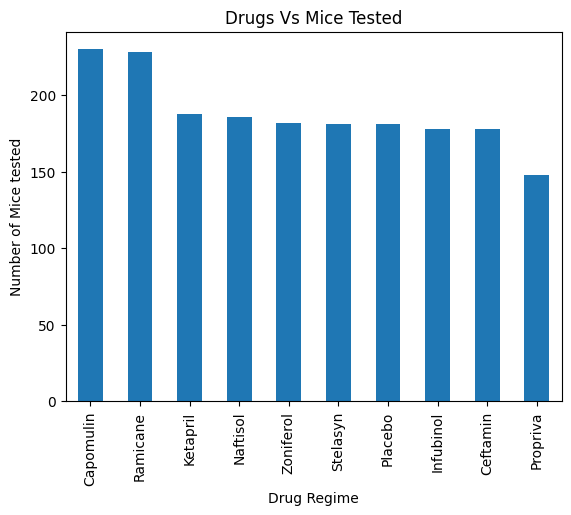

In [77]:
# Bar Chart Creation using Pandas
count = clean_data_df['Drug Regimen'].value_counts()
count.plot(kind = 'bar', xlabel ='Drug Regime', ylabel = 'Number of Mice tested')
plt.title('Drugs Vs Mice Tested')
plt.xticks(rotation = 90)
plt.show()

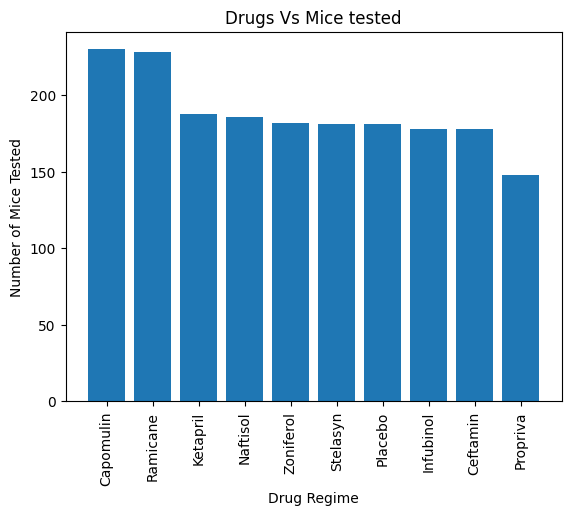

In [86]:
# Bar Chart Creation using pyplot
count = clean_data_df['Drug Regimen'].value_counts()
plt.bar(count.index.values, count.values)
plt.xlabel("Drug Regime")
plt.ylabel("Number of Mice Tested")
plt.title("Drugs Vs Mice tested")
plt.xticks(rotation = 90)
plt.show()

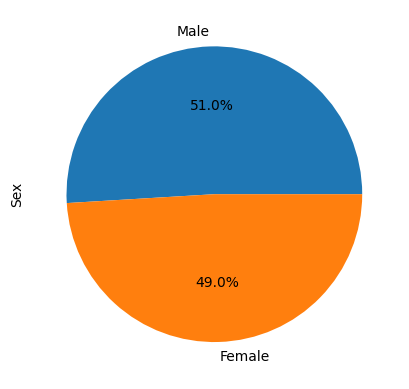

In [104]:
# Pie chart Creation using Pandas
sex_count = clean_data_df.Sex.value_counts()
sex_count.plot(kind = "pie", autopct = "%1.1f%%")
plt.show()

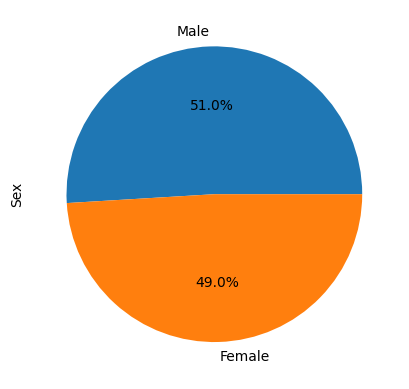

In [110]:
# Pie chart using pyplot
sex_count = clean_data_df.Sex.value_counts()
plt.pie(sex_count.values, labels=sex_count.index.values, autopct = "%1.1f%%")
plt.ylabel("Sex")
plt.show()

# Quartiles calculation, Outliers and Box PLot

In [117]:
# max tumour and merging
tumour_max = clean_data_df.groupby(["Mouse ID"])["Timepoint"].max()
tumour_max = tumour_max.reset_index()
merged_data = tumour_max.merge(clean_data_df, how = "left", on =['Mouse ID', 'Timepoint'])
merged_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [132]:
# list to hold the treatment names
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# list to hold tumour volume data
tumour_vol_list = []
for drug in treatment_list:
    final_tum_vol = merged_data.loc[merged_data["Drug Regimen"]==drug, "Tumor Volume (mm3)"]
    tumour_vol_list.append(final_tum_vol)
    # finding outliers
    quartiles = final_tum_vol.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    # finding outliers for each drug
    outliers = final_tum_vol.loc[(final_tum_vol < lower_bound) |(final_tum_vol > upper_bound) ]
    print(f"{drug}'s Outliers {outliers}")

Capomulin's Outliers Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's Outliers Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's Outliers 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's Outliers Series([], Name: Tumor Volume (mm3), dtype: float64)


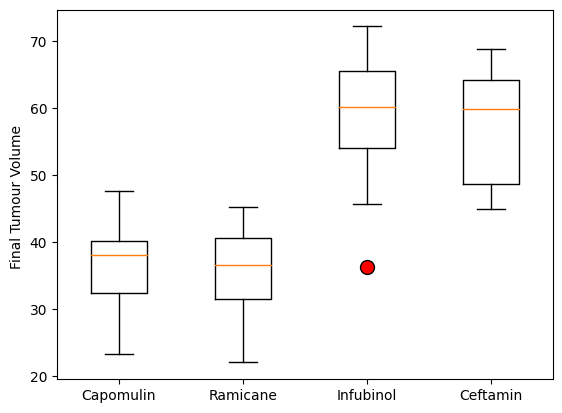

In [165]:
# Generating box plot using MatplotLib
orange_out = dict(markerfacecolor = 'red', markersize = 10)
plt.boxplot(tumour_vol_list, labels = treatment_list, flierprops = orange_out)
plt.ylabel("Final Tumour Volume ")
plt.show()

median:  21
lowerq:  17.5  upperq:  23.25  lower_bound:  8.875  upper_bound:  31.875
16


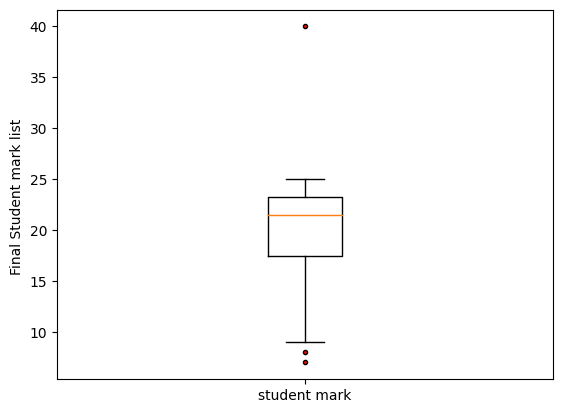

In [29]:
my_list = [25,23,21,20,22,25,21,23,22,24,10,7,8,9,20,40]

my_list.sort()
print("median: ",my_list[7])

quartiles = pd.Series(my_list).quantile([.25, .5, .75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print("lowerq: ",lowerq," upperq: ",upperq," lower_bound: ",lower_bound, " upper_bound: ",upper_bound)

print(len(my_list))
orange_out = dict(markerfacecolor = 'red', markersize = 3)
plt.boxplot(my_list, labels = ['student mark'], flierprops = orange_out)
plt.ylabel("Final Student mark list ")
plt.show()

# Line and Scatter Plots 

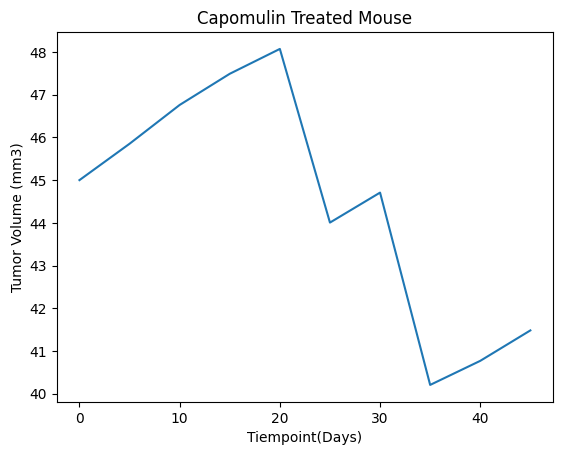

In [145]:
Capomulin_data = clean_data_df[clean_data_df["Drug Regimen"] == 'Capomulin' ]
mouse_data =  Capomulin_data[Capomulin_data['Mouse ID']== "l509"]
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"])
plt.xlabel("Tiempoint(Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treated Mouse")
plt.show()

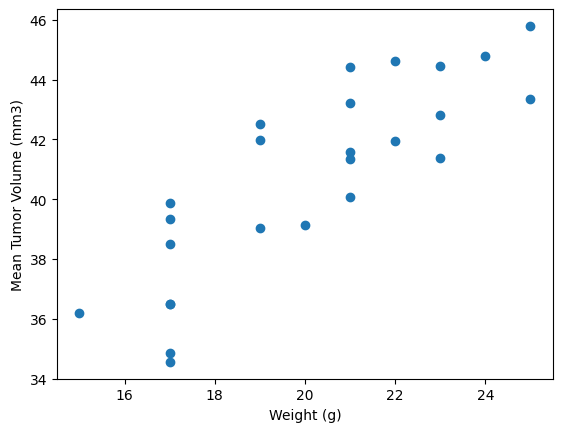

In [164]:
capomulin_average = Capomulin_data.groupby('Mouse ID').mean()
plt.scatter(capomulin_average['Weight (g)'], capomulin_average["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Mean Tumor Volume (mm3)")
plt.show()

The correlation between mouse weight and mean tumour volume is 0.84


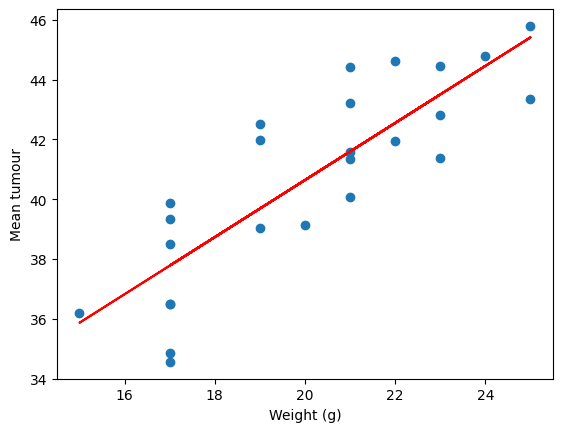

In [163]:
correl = st.pearsonr(capomulin_average['Weight (g)'], capomulin_average["Tumor Volume (mm3)"])
print(f'The correlation between mouse weight and mean tumour volume is {round(correl[0],2)}')


model = st.linregress(capomulin_average['Weight (g)'], capomulin_average["Tumor Volume (mm3)"])
slope = model[0]
b = model[1]
y_values = capomulin_average['Weight (g)'] * slope + b
plt.scatter(capomulin_average['Weight (g)'], capomulin_average["Tumor Volume (mm3)"])
plt.plot(capomulin_average['Weight (g)'], y_values, color = "red")
plt.xlabel("Weight (g)")
plt.ylabel("Mean tumour")
plt.show()

In [139]:
Capomulin_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1878,i557,45,47.685963,1,Capomulin,Female,1,24
1888,r944,45,41.581521,2,Capomulin,Male,12,25
